In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'../dataset/raw_data/ecommerce_delivery_analytics.csv')

In [ ]:
df.info()

In [3]:
df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [3]:
customer_info = pd.DataFrame(columns=['Customer ID'])
customer_info['Customer ID'] = pd.DataFrame(df['Customer ID'].unique())

In [5]:
customer_info.to_csv(r'../dataset/dimensions/dim_customer_info.csv',index=False)

In [6]:
platforms_df = pd.DataFrame(columns=['platform_id' , 'platform_name','platform_code'])

In [7]:
platforms_df['platform_name'] = pd.DataFrame(df['Platform'].unique())

In [8]:
platforms_df['platform_id'] = [1,2,3]

In [9]:
platforms_df['platform_code'] = ['JIO','BLK','SWI']

In [10]:
platforms_df.to_csv(r'../dataset/dimensions/dim_platform_info.csv',index=False)

In [11]:
product_category_mapping = {'Dairy ':1,'Grocery':2,'Snacks':3,'Fruits & Vegetables':4,'Beverages':5,'Personal Care':6}

In [12]:
product_categories_df = pd.DataFrame(list(product_category_mapping.items()),columns=['category_name','category_id'])

In [13]:
product_categories_df = product_categories_df[['category_id','category_name']]

In [14]:
product_categories_df.to_csv(r'../dataset/dimensions/dim_product_categories.csv',index=False)

In [15]:
orders_df = pd.DataFrame(columns=['order_id','customer_id','platform_id','category_id','order_datetime','delivery_time_min','order_value_inr','delivery_delay','refund_requested','service_rating','customer_feedback'])

In [16]:
orders_df['order_id'] = df['Order ID']
orders_df['customer_id'] = df['Customer ID']
orders_df['order_datetime'] = df['Order Date & Time']
orders_df['delivery_time_min'] = df['Delivery Time (Minutes)']
orders_df['order_value_inr'] = df['Order Value (INR)']
orders_df['delivery_delay'] = df['Delivery Delay']
orders_df['refund_requested'] = df['Refund Requested']
orders_df['service_rating'] = df['Service Rating']
orders_df['customer_feedback'] = df['Customer Feedback']

In [17]:
platform_map = {'JioMart':1,'Blinkit':2,'Swiggy Instamart':3}
product_category_mapping = {'Dairy':1,'Grocery':2,'Snacks':3,'Fruits & Vegetables':4,'Beverages':5,'Personal Care':6}

In [18]:
orders_df['platform_id'] = df['Platform'].map(platform_map)

In [19]:
orders_df['category_id'] = df['Product Category'].map(product_category_mapping)

In [20]:
orders_df = orders_df.rename(columns={'category_id':'product_category_id'})

In [21]:
orders_df.to_csv(r'../dataset/dimensions/dim_orders.csv',index=False)

In [24]:
orders_df

,order_id,customer_id,platform_id,product_category_id,order_datetime,delivery_time_min,order_value_inr,delivery_delay,refund_requested,service_rating,customer_feedback
0,ORD000001,CUST2824,1,4,19:29.5,30,382,No,No,5,"Fast delivery, great service!"
1,ORD000002,CUST1409,2,1,54:29.5,16,279,No,No,5,Quick and reliable!
2,ORD000003,CUST5506,1,5,21:29.5,25,599,No,Yes,2,Items missing from order.
3,ORD000004,CUST5012,1,5,19:29.5,42,946,Yes,Yes,2,Items missing from order.
4,ORD000005,CUST4657,2,5,49:29.5,30,334,No,No,5,"Fast delivery, great service!"
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,1,1,49:29.5,24,289,No,No,3,Packaging could be better.
99996,ORD099997,CUST1677,1,3,18:29.5,19,322,No,No,4,Good quality products.
99997,ORD099998,CUST8198,1,1,27:29.5,41,135,Yes,No,5,"Fast delivery, great service!"
99998,ORD099999,CUST9975,1,2,14:29.5,31,973,No,No,5,Quick and reliable!


In [26]:
df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [31]:
df

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


C:\Users\danis\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\danis\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


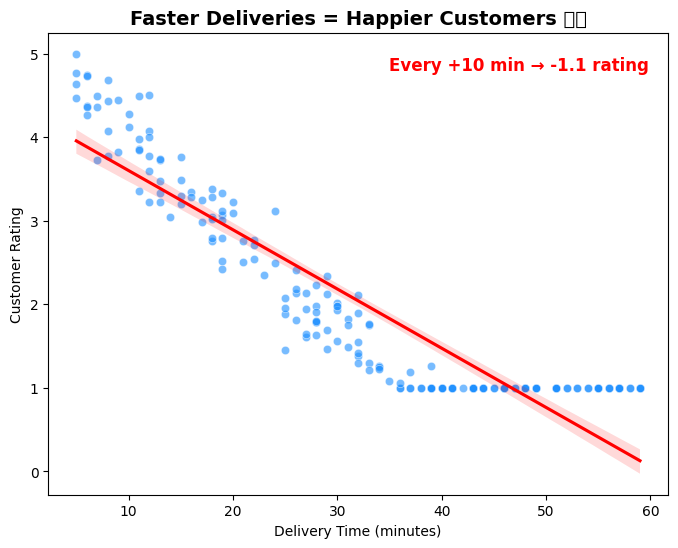

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Example synthetic dataset
np.random.seed(42)
delivery_time = np.random.randint(5, 60, 200)  # delivery times
ratings = 5 - 0.11*delivery_time + np.random.normal(0,0.3,200)  # rating declines as time ↑
ratings = np.clip(ratings, 1, 5)  # keep within 1–5

df = pd.DataFrame({"delivery_time": delivery_time, "rating": ratings})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="delivery_time", y="rating", data=df, alpha=0.6, color="dodgerblue")

# Regression line
sns.regplot(x="delivery_time", y="rating", data=df, scatter=False, color="red")

# Annotation for slope insight
plt.text(35, 4.8, "Every +10 min → -1.1 rating", fontsize=12, color="red", weight="bold")

# Titles and labels
plt.title("Faster Deliveries = Happier Customers 🚚✨", fontsize=14, weight="bold")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Customer Rating")

plt.show()
